<a href="https://colab.research.google.com/github/ArmanAghania/Data-Analysis-Concepts-done-with-Python/blob/main/Google_Causal_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries and Dates

In [ ]:
#Install Libraries
! pip install yfinance tfcausalimpact

In [2]:
#Import Libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#Define Dates
training_start = '2020-09-01'
training_end = '2020-10-19'
treatment_start = '2020-10-20'
treatment_end = '2020-10-23'
end_stock = '2020-10-24'

#Loading Financial Data

In [37]:
#Bitcoin Data
y = ['BTC-USD']
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = '1d')
y = y['Adj Close'].rename('y')
y[:1]

[*********************100%***********************]  1 of 1 completed


Date
2014-09-17    457.334015
Name: y, dtype: float64

In [9]:
 #Load more Stock Data
stocks = ['CARL-B.CO', 'ZAL.DE', 'SQ', 'CRSP', 'TRMB', 'JD', 'DE', 'KTOS', 'GOOGL']
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = '1d')
X.head()

[*********************100%***********************]  9 of 9 completed


Adj Close                         ...      Volume                   
             CARL-B.CO       CRSP          DE  ...          SQ       TRMB  ZAL.DE
Date                                           ...                               
2020-09-01  794.451172  93.419998  210.679581  ...  12306400.0   542300.0  790198
2020-09-02  802.765137  93.930000  210.118271  ...  11214800.0   728800.0  496554
2020-09-03  818.099854  85.690002  204.021149  ...  16421200.0  1220300.0  736259
2020-09-04  804.612671  82.019997  204.534088  ...  17995200.0   914700.0  662250
2020-09-07  812.926758        NaN         NaN  ...         NaN        NaN  362062

[5 rows x 54 columns]

In [10]:
#Getting just the Adjusted Close
X = X.iloc[:, :len(stocks)]
X.head()

Adj Close                         ...                                  
             CARL-B.CO       CRSP          DE  ...          SQ       TRMB     ZAL.DE
Date                                           ...                                  
2020-09-01  794.451172  93.419998  210.679581  ...  166.660004  53.410000  77.000000
2020-09-02  802.765137  93.930000  210.118271  ...  162.880005  54.310001  77.000000
2020-09-03  818.099854  85.690002  204.021149  ...  152.860001  50.900002  75.080002
2020-09-04  804.612671  82.019997  204.534088  ...  146.389999  49.959999  71.739998
2020-09-07  812.926758        NaN         NaN  ...         NaN        NaN  74.000000

[5 rows x 9 columns]

In [11]:
#Removing Unneeded Level
X.columns = X.columns.droplevel()
X.head()

,CARL-B.CO,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,794.451172,93.419998,210.679581,82.753998,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,802.765137,93.930000,210.118271,85.869499,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,818.099854,85.690002,204.021149,81.475502,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,804.612671,82.019997,204.534088,79.060501,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-07,812.926758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


In [12]:
#Combine Everything
df = pd.concat([y, X], axis = 1).dropna()
df.head()

,y,CARL-B.CO,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-01,11970.478516,794.451172,93.419998,210.679581,82.753998,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,11414.034180,802.765137,93.930000,210.118271,85.869499,79.959564,19.910000,162.880005,54.310001,77.000000
2020-09-03,10245.296875,818.099854,85.690002,204.021149,81.475502,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,10511.813477,804.612671,82.019997,204.534088,79.060501,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-08,10131.516602,799.439575,81.459999,203.469513,76.180000,73.242615,19.230000,139.110001,49.139999,73.440002


#Data Analysis

In [15]:
#Prepare DataFrame with only Training Data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-10-13,11425.899414,827.892029,103.059998,230.369644,78.353500,79.382996,20.959999,190.470001,51.720001,85.820000
2020-10-14,11429.506836,822.718811,101.370003,231.583557,78.171997,77.931984,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,808.492554,99.889999,231.360199,77.773499,77.115181,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,801.656555,109.830002,233.127640,78.385002,78.335571,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,804.427979,107.720001,231.292236,76.497498,77.461121,20.639999,186.960007,51.970001,85.000000


In [25]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = df_training.y)[1]
print(test)

if test < 0.05:
  print('The Time Series is stationary')
else:
  print('The Time Series is not stationary')

0.0987470320882271
The Time Series is not stationary


In [26]:
#Differencing
differencing = df_training.pct_change().dropna()
differencing.head()

#Stationarity

test = adfuller(x = differencing.y)[1]
print(test)

if test < 0.05:
  print('The Time Series is stationary')
else:
  print('The Time Series is not stationary')

3.8054323617260893e-07
The Time Series is stationary


<Axes: >

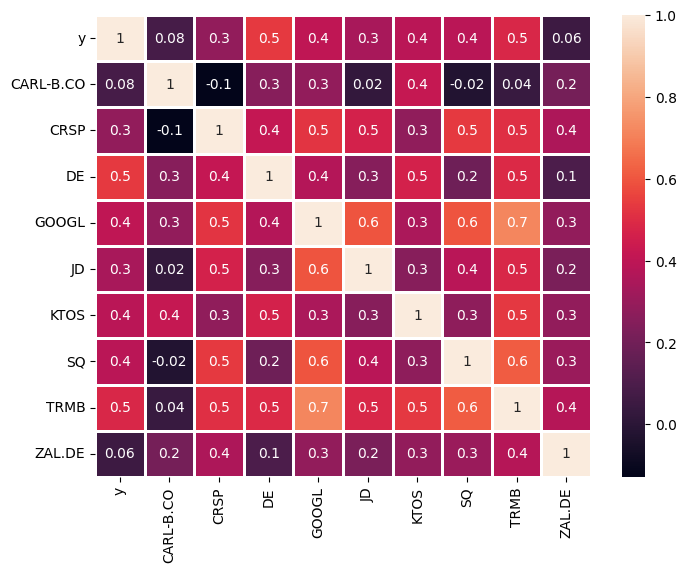

In [27]:
#Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            linewidths = 1,
            linecolor = 'white')

#Google Causal Impact

In [28]:
#Prepare the Dataset
df_final = df.drop(columns = ['CARL-B.CO', 'ZAL.DE'])
df_final.head()

,y,CRSP,DE,GOOGL,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.679581,82.753998,79.267685,19.700001,166.660004,53.410000
2020-09-02,11414.034180,93.930000,210.118271,85.869499,79.959564,19.910000,162.880005,54.310001
2020-09-03,10245.296875,85.690002,204.021149,81.475502,75.952454,19.520000,152.860001,50.900002
2020-09-04,10511.813477,82.019997,204.534088,79.060501,76.874954,19.260000,146.389999,49.959999
2020-09-08,10131.516602,81.459999,203.469513,76.180000,73.242615,19.230000,139.110001,49.139999


In [29]:
#Prepare pre and post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


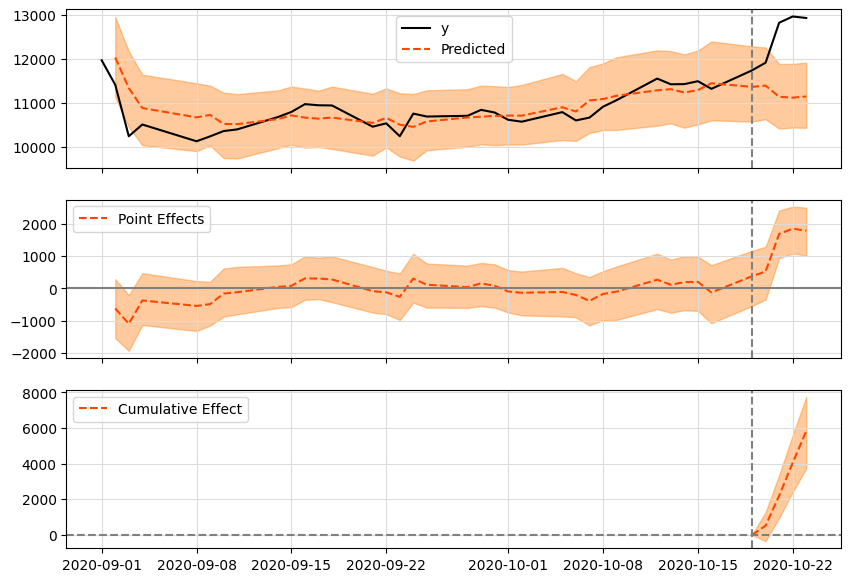

In [30]:
#Google Causal Impact
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

In [32]:
#Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11201.98 (238.7)   44807.91 (954.8)
95% CI                    [10760.13, 11695.82][43040.5, 46783.26]

Absolute effect (s.d.)    1457.39 (238.7)    5829.54 (954.8)
95% CI                    [963.55, 1899.24]  [3854.19, 7596.95]

Relative effect (s.d.)    13.01% (2.13%)     13.01% (2.13%)
95% CI                    [8.6%, 16.95%]     [8.6%, 16.95%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [33]:
#Summary Report
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11201.98.
The 95% interval of this counterfactual prediction is [10760.13, 11695.82].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1457.39 with a 95% interval of
[963.55, 1899.24]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44807.91. The 95% interval of this prediction is [43040.5, 46783.26].


The above results are given in terms of absolute numbers. In relative
te